<a href="https://colab.research.google.com/github/ArunamAlok/DSSI/blob/main/A3_3_Alok_Arunam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing basic libraries

import pandas as pd
import numpy as np

In [ ]:
cafereview_ds = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/dataset1-cafe_reviews-23_sept-raw.csv')
cafereview_ds.head()
cafereview_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           775 non-null    int64 
 1   Name            775 non-null    object
 2   Overall_Rating  775 non-null    object
 3   Cuisine         775 non-null    object
 4   Rate for two    775 non-null    object
 5   City            775 non-null    object
 6   Review          775 non-null    object
dtypes: int64(1), object(6)
memory usage: 42.5+ KB


In [ ]:
#Seeing values overall

print(set(cafereview_ds['Overall_Rating']))

#print(cafereview_ds.Overall_Rating.unique())

{'3.9', '4.2', '4.1', '3.2', '4.3', '4.4', '3', '-', '3.4', '3.6', '2.6', '3.8', '3.3', '2.8', '4.5', '4.9', '4.8', '3.5', '2.5', '2.7', 'New', '2.9', '3.7', '4', '3.1'}


In [ ]:
# Removing certain values by ignoring certain rows

cafereview_ds.filtered = cafereview_ds.drop(cafereview_ds[(cafereview_ds['Overall_Rating'] == 'New')].index) # Remove rows having 'New'
cafereview_ds.filtered = cafereview_ds.filtered.drop(cafereview_ds.filtered[(cafereview_ds.filtered['Overall_Rating'] == '-')].index) # Remove rows having '-'
print(set(cafereview_ds.filtered['Overall_Rating'])) # Confirm that the rows having 'New' and '-' have been removed
cafereview_ds.filtered.shape
#list=['New','-']
#cafereview_ds1[cafereview_ds1.Overall_Rating.isin(list) == False]

{'3.9', '4.2', '4.1', '3.2', '4.3', '4.4', '3', '3.4', '3.6', '2.6', '3.8', '3.3', '2.8', '4.5', '4.9', '4.8', '3.5', '2.5', '2.7', '2.9', '3.7', '4', '3.1'}


(658, 7)

In [ ]:
cafereview_ds.filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 0 to 769
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           658 non-null    int64 
 1   Name            658 non-null    object
 2   Overall_Rating  658 non-null    object
 3   Cuisine         658 non-null    object
 4   Rate for two    658 non-null    object
 5   City            658 non-null    object
 6   Review          658 non-null    object
dtypes: int64(1), object(6)
memory usage: 41.1+ KB


In [ ]:
cafereview_ds.filtered['Overall_Rating'] = cafereview_ds.filtered['Overall_Rating'].astype('float') # convert remaining rows to float and save in 'rating_float'
cafereview_ds.filtered['Label'] = ["GOOD" if i>3.5 else "BAD" for i in cafereview_ds.filtered['Overall_Rating']]
cafereview_ds.filtered.head()
#type(cafereview_ds['Overall_Rating'])
#cafereview_ds['Overall_Rating'] = cafereview_ds['Overall_Rating'].astype(str).astype(float)

,Index,Name,Overall_Rating,Cuisine,Rate for two,City,Review,Label
0,0,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,Been to this place 3-4 times. Prakash is alway...,GOOD
1,1,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,I recently visited Oliver Brown on a weekend f...,GOOD
2,2,Crush Coffee,3.0,"Cafe, Shake, Beverages, Desserts",600,ahmedabad,Very watery ans thin shake,BAD
3,3,The Mohalla,3.8,Cafe,550,ahmedabad,it was not cheese burst pizza.. only cheeze wa...,GOOD
4,4,The Mohalla,3.8,Cafe,550,ahmedabad,"Yammi.,....test burger is best I love 💗 this B...",GOOD


In [ ]:
cafereview_ds.final = cafereview_ds.filtered[['Review','Label']]


cafereview_ds.final.to_csv("cafe_sentiment.csv")

cafereview_ds.final.shape #view the final shape (number of rows and columns) of the dataframe
print(cafereview_ds.final)

                                                Review Label
0    Been to this place 3-4 times. Prakash is alway...  GOOD
1    I recently visited Oliver Brown on a weekend f...  GOOD
2                           Very watery ans thin shake   BAD
3    it was not cheese burst pizza.. only cheeze wa...  GOOD
4    Yammi.,....test burger is best I love 💗 this B...  GOOD
..                                                 ...   ...
765                                        it's bad...  GOOD
766                                                  😋   BAD
767  Ordered first time and grilled patty was so yu...   BAD
768  It is a very good breakfast and you will love ...   BAD
769                                       Paisa wasool   BAD

[658 rows x 2 columns]


In [ ]:
#Text Classifier
#Model-1

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(cafereview_ds.final.Review)
print(X_train_counts.shape)

print(count_vect.get_feature_names_out())

#count_vect2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
#count_vect2.fit_transform(cafereview_ds.final.Review)
#print(count_vect2.get_feature_names_out())

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

print(tfidf_transformer.get_feature_names_out())

#Building model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train_tfidf, cafereview_ds.final.Label, test_size=0.30, random_state=0)
print(X_train.shape, X_test.shape)

from sklearn.naive_bayes import MultinomialNB #import classifier
model1 = MultinomialNB().fit(X_train, Y_train) # fit the classifier

#Model Performance
from sklearn import metrics
Y_pred1=model1.predict(X_test)
print(cafereview_ds.final.Review[1],cafereview_ds.final.Label[1]Y_pred1)
#print(cafereview_ds.final.Label, predicted)
print(metrics.classification_report(Y_test,Y_pred1))
print(metrics.confusion_matrix(Y_test, Y_pred1))

(658, 2959)
['10' '100' '1000' ... 'zolocrust' 'zomato' 'ànd']
(658, 2959)
['x0' 'x1' 'x2' ... 'x2956' 'x2957' 'x2958']
(460, 2959) (198, 2959)
              precision    recall  f1-score   support

         BAD       0.00      0.00      0.00        62
        GOOD       0.69      1.00      0.81       136

    accuracy                           0.69       198
   macro avg       0.34      0.50      0.41       198
weighted avg       0.47      0.69      0.56       198

[[  0  62]
 [  0 136]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Text Classifier
#Model-2

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(cafereview_ds.final.Review)
print(X_train_counts.shape)

print(count_vect.get_feature_names_out())

#count_vect2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
#count_vect2.fit_transform(cafereview_ds.final.Review)
#print(count_vect2.get_feature_names_out())

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

print(tfidf_transformer.get_feature_names_out())

#Building model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train_tfidf, cafereview_ds.final.Label, test_size=0.30, random_state=0)
print(X_train.shape, X_test.shape)

from sklearn.linear_model import SGDClassifier
model2=SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None).fit(X_train, Y_train)


#Model Performance
from sklearn import metrics
Y_pred2 = model2.predict(X_test)
#print(cafereview_ds.final.Label, Y_pred2)
print(metrics.classification_report(Y_test, Y_pred2))
print(metrics.confusion_matrix(Y_test, Y_pred2))

(658, 2959)
['10' '100' '1000' ... 'zolocrust' 'zomato' 'ànd']
(658, 2959)
['x0' 'x1' 'x2' ... 'x2956' 'x2957' 'x2958']
(460, 2959) (198, 2959)
              precision    recall  f1-score   support

         BAD       0.58      0.18      0.27        62
        GOOD       0.72      0.94      0.81       136

    accuracy                           0.70       198
   macro avg       0.65      0.56      0.54       198
weighted avg       0.67      0.70      0.64       198

[[ 11  51]
 [  8 128]]


In [ ]:
#predictive accuracy of the model

print(np.mean(Y_pred1 == Y_test))
print(np.mean(Y_pred2 == Y_test))


0.6868686868686869
0.702020202020202


In [ ]:
#Building Pipeline



In [ ]:
ade_ds = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/dataset2-adverse_drug_effects-23_sept-raw.csv')
print(ade_ds.head())
ade_ds.info()

         ID  LABEL                                               Text
0   6460590   NEG    Clioquinol intoxication occurring in the trea...
1   8600337   NEG    "Retinoic acid syndrome" was prevented with s...
2   8402502   NEG    BACKGROUND: External beam radiation therapy o...
3   8700794   NEG    Although the enuresis ceased, she developed t...
4  17662448   NEG    A 42-year-old woman had uneventful bilateral ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20958 entries, 0 to 20957
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      20958 non-null  int64 
 1   LABEL   20958 non-null  object
 2   Text    20958 non-null  object
dtypes: int64(1), object(2)
memory usage: 491.3+ KB


In [ ]:
!pip install scispacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 6.4 MB/s eta 0:00:00
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
  Created wheel for nmslib: filename=nmslib-2.1.1-cp310-cp310-linux_x86_64.whl size=13578646 sha256=89e214327b4440c8d999e574a7b1a857779fc6aca251c5f89f621920de638212
  Stored in directory: /root/.cache/pip/wheels/21/1a/5d/4cc754a5b1a88405cad184b76f823897a63a8d19afcd4b9314
Successfully built nmslib
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully unins

In [ ]:
import spacy #text processing
from spacy import displacy
import scispacy #biomedical text processing

In [ ]:
# Downloading en_core_web_sm
!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_trf

NER = spacy.load('en_core_web_sm')
#NER2=spacy.load('en_core_web_trf')

2023-09-25 02:52:04.452813: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
sample_text = "Artificial Intelligence (AI), an ever-evolving field, has witnessed remarkable growth since its inception. Dating back to the Dartmouth Conference in 1956, AI has emerged as a multidisciplinary domain encompassing machine learning, natural language processing (NLP), computer vision, and robotics. Recent breakthroughs, like the introduction of deep learning techniques in the early 2010s, have accelerated AI advancements. Tech giants like Google, IBM, and Microsoft have invested heavily in AI research and development. Significant milestones include the landmark victory of IBM's Deep Blue over Garry Kasparov in 1997 and the emergence of voice assistants like Apple's Siri in 2011. AI continues to shape industries across healthcare, finance, and transportation, fueling innovation and transforming the way we live and work."
# load the normal model used for better efficiency.

# predict the entities
text = NER(sample_text)
# display the text and highlighted entities with jupyter mode
spacy.displacy.render(text, style="ent", jupyter=True)

In [ ]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [ ]:
#doc1 = NER("apple is looking at buying U.K. startup for $1 billion")
#doc2 = NER("The Mars Orbiter Mission (MOM), informally known as Mangalyaan, was launched into Earth orbit on 5 November 2013 by the Indian Space Research Organisation (ISRO) and has entered Mars orbit on 24 September 2014. India thus became the first country to enter Mars orbit on its first attempt. It was completed at a record low cost of $74 million")
doc1 = NER("When Sebastian Thrun started working on self-driving cars at Google in 2007, few people outside of the company took him seriously.")

for word in doc1.ents:
    print(word.text, word.label_)

dict_doc1 = {}
for word in doc1.ents:
    dict_doc1[word.text]=word.label_
print(dict_doc1)

spacy.displacy.render(doc1, style="ent", jupyter=True)

displacy.render(doc1, style='dep', jupyter=True, options={'distance': 90}) #dependencyparsing

Sebastian Thrun PERSON
Google ORG
2007 DATE
{'Sebastian Thrun': 'PERSON', 'Google': 'ORG', '2007': 'DATE'}


In [ ]:
sample1= ade_ds.Text.iloc[1]
print(sample1)
#doc4=NER(sample1)
doc4 = NER("Alterations in the hypocretin receptor 2 and preprohypocretin genes produce narcolepsy in some animals.")
for word in doc4.ents:
    print(word.text, word.label_)
spacy.displacy.render(doc4, style="ent", jupyter=True)

 "Retinoic acid syndrome" was prevented with short-time treatment of high dose (4 x 1.5 g/m2) cytarabine.
narcolepsy DISEASE


In [ ]:
# Downloading en_core_sci_sm

!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_sm-0.5.1.tar.gz
import en_core_sci_sm
NER = spacy.load("en_core_sci_sm") # A full spaCy pipeline for biomedical data.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.5.1-py3-none-any.whl size=15870853 sha256=3b436b81a7886fe2632ee5c9d67078fc0b6a3ea29a43ad030eb1d1ad0d6cc9f0
  Stored in directory: /root/.cache/pip/wheels/35/8f/33/4c20916692704167c1d78c3f11e7deff5b7c2ba4875eacf648
Successfully built en-core-sci-sm


In [ ]:
# Downloading en_ner_bc5cdr_md
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz
import en_ner_bc5cdr_md
NER = spacy.load("en_ner_bc5cdr_md") # A spaCy NER model trained on the BC5CDR corpus.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 MB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-ner-bc5cdr-md: filename=en_ner_bc5cdr_md-0.5.1-py3-none-any.whl size=120217632 sha256=6c1a53b50d9178c0db37a81e18f44cbe30c25bd99cd9aa2ef5e26e2ac7625d26
  Stored in directory: /root/.cache/pip/wheels/89/bf/71/af9266a822964b06d994e4cd80dd9300018b20027b8ae5ae14
Successfully built en-ner-bc5cdr-md


In [ ]:
# tqdm makes your loops show a smart progress meter

from tqdm import tqdm
all_data = []
for i in tqdm(ade_ds.Text):
  dict_doc = {}
  doc = NER(i.lower())
  for word in doc.ents:
    if word.label_ == "CHEMICAL":
      dict_doc[word.text.lower()]=1

  all_data.append(dict_doc)

100%|██████████| 20958/20958 [05:10<00:00, 67.54it/s]


In [ ]:
ade_ds1=pd.DataFrame(all_data)
ade_ds1.head()


,clioquinol,retinoic acid,cytarabine,dihydropyrimidine,5-fu,tramadol,gabapentin,cetirizine,modafinil,carisoprodol,...,metrifonate,nitrate,voglibose,vitamin d intoxication,salt toxicity,oxpentifylline,"cream,",betamethasone valerate cream,vitamin d poisoning,pirmenol hydrochloride-induced
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ade_ds1["LABEL"] = ade_ds.LABEL
ade_ds2 = ade_ds1.groupby('LABEL').sum().transpose() #This creates labels.
ade_ds2['SUM'] = ade_ds1.sum().transpose()
ade_ds2 = ade_ds2.sort_index()
ade_ds2

LABEL,NEG,POS,SUM
(-)-epigallocatechin gallate,1.0,0.0,1.0
.14,1.0,0.0,1.0
0.125,1.0,0.0,1.0
"1,25-dihydroxyvitamin",5.0,0.0,5.0
"1,3-bis(2-chloroethyl)-1-nitrosourea",0.0,1.0,1.0
...,...,...,...
zomepirac,3.0,2.0,5.0
zomepirac sodium,0.0,1.0,1.0
zonisamide,5.0,8.0,13.0
zuclopenthixol,0.0,5.0,5.0


In [ ]:
ade_ds1["LABEL"] = ade_ds.LABEL
ade_ds2 = ade_ds1.groupby('LABEL').sum()
ade_ds2.head()

,clioquinol,retinoic acid,cytarabine,dihydropyrimidine,5-fu,tramadol,gabapentin,cetirizine,modafinil,carisoprodol,...,metrifonate,nitrate,voglibose,vitamin d intoxication,salt toxicity,oxpentifylline,"cream,",betamethasone valerate cream,vitamin d poisoning,pirmenol hydrochloride-induced
LABEL,,,,,,,,,,,,,,,,,,,,,
NEG,3.0,3.0,8.0,5.0,29.0,2.0,14.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
POS,4.0,3.0,10.0,3.0,12.0,0.0,5.0,0.0,0.0,0.0,...,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0


In [ ]:
#K-means algorithm
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(ade_ds.Text)
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

n_samples: 20958, n_features: 17122


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


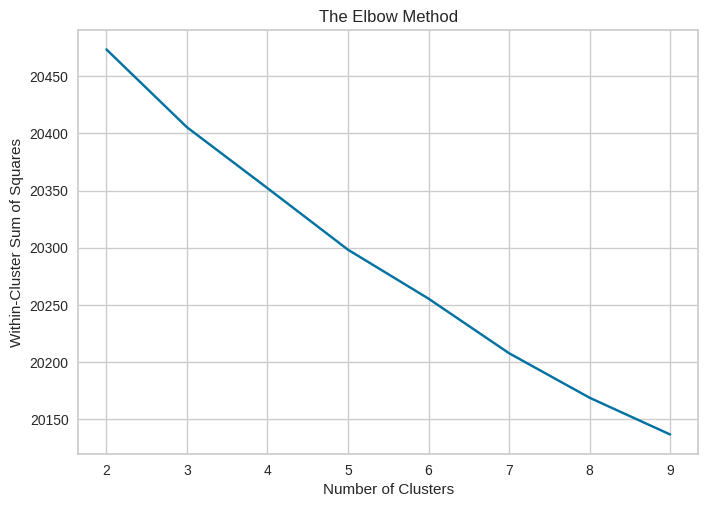

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

wcss=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X_tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [ ]:
labels = ade_ds.LABEL
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(ade_ds.Text)} documents - {true_k} categories")


20958 documents - 2 categories


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2,11):
  k_val=2
  model = KMeans(n_clusters=i,  max_iter=100, n_init=1, random_state=5).fit(X_tfidf)
  cluster_ids, cluster_sizes = np.unique(model.labels_, return_counts=True)
  print(f"Number of clusters: {i}")
  print(f"Number of documents assigned to each cluster: {cluster_sizes}")
  silhouette_avg = silhouette_score(X_tfidf,model.fit_predict(X_tfidf))
  print("The average silhouette_score is :", silhouette_avg)


Number of clusters: 2
Number of documents assigned to each cluster: [12579  8379]
The average silhouette_score is : 0.0028927114321090353
Number of clusters: 3
Number of documents assigned to each cluster: [ 3159 10192  7607]
The average silhouette_score is : 0.003106472231438018
Number of clusters: 4
Number of documents assigned to each cluster: [ 2849 10089  5651  2369]
The average silhouette_score is : 0.0029554993832407316
Number of clusters: 5
Number of documents assigned to each cluster: [2837 9560 5209 2331 1021]
The average silhouette_score is : 0.0034025247561786398
Number of clusters: 6
Number of documents assigned to each cluster: [7309 3627 2340 2257  968 4457]
The average silhouette_score is : 0.003748274949452854
Number of clusters: 7
Number of documents assigned to each cluster: [2536 3092 2274 2089  966 6334 3667]
The average silhouette_score is : 0.004081786617058923
Number of clusters: 8
Number of documents assigned to each cluster: [1083 3233 4099 2476 1326 1047  907

In [ ]:
k_val=2
model = KMeans(n_clusters=k_val,  max_iter=100, n_init=1, random_state=5).fit(X_tfidf)
cluster_ids, cluster_sizes = np.unique(model.labels_, return_counts=True)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

k_val=2
kmeans = KMeans(n_clusters=k_val,  max_iter=100, n_init=1, random_state=5).fit(ade_ds2.LABEL)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)


AttributeError: ignored

In [ ]:
ade_ds2.LABEL.iloc[1]

AttributeError: ignored

In [ ]:

# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt


def word_cloud(text,wc_title,wc_file_name='wordcloud.jpeg'):
    # Create stopword list
    stopword_list = set(STOPWORDS)

    # Create WordCloud
    word_cloud = WordCloud(width = 800, height = 500,
                           background_color ='white',
                           stopwords = stopword_list,
                           min_font_size = 14).generate(text)

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6))

    # Set title for word cloud
    plt.title(wc_title)

    # Show image
    plt.imshow(word_cloud)

    # Remove Axis
    plt.axis("off")

    # save word cloud
    plt.savefig(wc_file_name,bbox_inches='tight')

    # show plot
    plt.show()

In [ ]:
import pandas as pd
df=pd.DataFrame({"text":X_tfidf,"labels":model.labels_})


for i in df.labels.unique():
    new_df=df[df.labels==i]
    text="".join(new_df.text.tolist())
    word_cloud(text,twenty_train.target_names[i], twenty_train.target_names[i]+'.jpeg')

TypeError: ignored

In [ ]:
kmeans=KMeans(n_clusters=5, init='k-means++',random_state=0)
silhouette_avg = silhouette_score(X_tfidf,kmeans.fit_predict(X_tfidf))
print("The average silhouette_score is :", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.003211626818060752


In [ ]:
kmeans=KMeans(n_clusters=3, init='k-means++',random_state=0)
silhouette_avg = silhouette_score(X_tfidf,kmeans.fit_predict(X_tfidf))
print("The average silhouette_score is :", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.0025540902359038665


In [ ]:
from collections import defaultdict
from time import time

from sklearn import metrics

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)


In [ ]:
kmeans = KMeans(n_clusters=i)


fit_and_evaluate(kmeans, X_tfidf, name="KMeans\non tf-idf vectors")

clustering done in 0.40 ± 0.10 s 
Homogeneity: 0.018 ± 0.001
Completeness: 0.024 ± 0.000
V-measure: 0.021 ± 0.001
Adjusted Rand-Index: 0.092 ± 0.003
Silhouette Coefficient: 0.002 ± 0.000


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

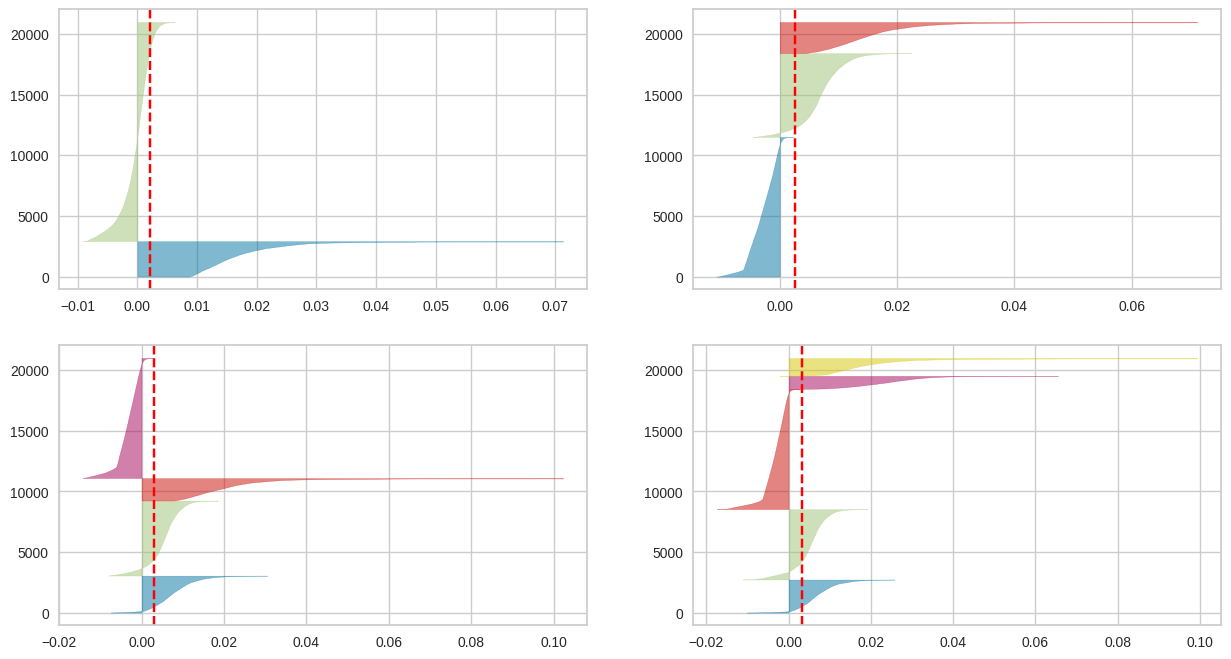

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_tfidf)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus =['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [ ]:
ade_ds.head()

,ID,LABEL,Text
0,6460590,NEG,Clioquinol intoxication occurring in the trea...
1,8600337,NEG,"""Retinoic acid syndrome"" was prevented with s..."
2,8402502,NEG,BACKGROUND: External beam radiation therapy o...
3,8700794,NEG,"Although the enuresis ceased, she developed t..."
4,17662448,NEG,A 42-year-old woman had uneventful bilateral ...


In [ ]:
ade_ds2.head()

,clioquinol,retinoic acid,cytarabine,dihydropyrimidine,5-fu,tramadol,gabapentin,cetirizine,modafinil,carisoprodol,...,metrifonate,nitrate,voglibose,vitamin d intoxication,salt toxicity,oxpentifylline,"cream,",betamethasone valerate cream,vitamin d poisoning,pirmenol hydrochloride-induced
LABEL,,,,,,,,,,,,,,,,,,,,,
NEG,3.0,3.0,8.0,5.0,29.0,2.0,14.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
POS,4.0,3.0,10.0,3.0,12.0,0.0,5.0,0.0,0.0,0.0,...,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0


                                                document  cluster
18736  a republican congressman just destroyed trump'...        1
5496   georgia to provide planned parenthood with fre...        0
24037  man's ear violently contorted in earphone's vi...        0
19121  heaven installs spikes to keep cherubs from sh...        0
9393                           all the women i have been        0


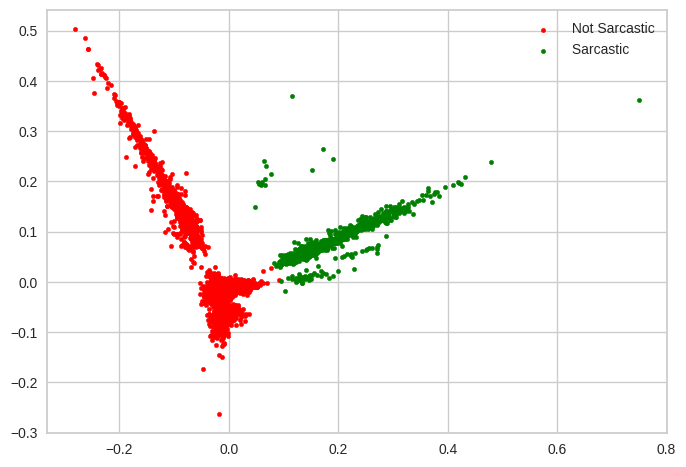

In [ ]:

# import the necessary libraries
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Dataset link:
# https://github.com/PawanKrGunjan/Natural-Language-Processing/blob/main/Sarcasm%20Detection/sarcasm.json
df=pd.read_json('/content/drive/My Drive/Colab Notebooks/Data/sarcasm.json')

# Extract the sentence only
sentence = df.headline

# create vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# vectorizer the text documents
vectorized_documents = vectorizer.fit_transform(sentence)

# reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())


# cluster the documents using k-means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5,
                max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)


# create a dataframe to store the results
results = pd.DataFrame()
results['document'] = sentence
results['cluster'] = kmeans.labels_

# print the results
print(results.sample(5))

# plot the results
colors = ['red', 'green']
cluster = ['Not Sarcastic','Sarcastic']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i],
                label=f' {cluster[i]}')
plt.legend()
plt.show()

In [ ]:
print(((results['Label']=='POS') & (results['cluster']==3)).sum())

